WAV files are with 44100 samples persecond resolution

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

LETS SEE DIFFERENT WAVE SHAPES

SIN WAVE SIGNAL 

In [4]:
# freq , amt of cycles in seconds

freq = 1 #hz
sample_rate = 44100
length = 1.0  #length of signal



NUMPY TO CREATE AN ARRAY 

In [5]:
time = np.arange(0,length,1.0/sample_rate) ## every item in array

signal = np.sin(np.pi *2 * freq * time)  ## 44100 in a sin wav in one cycle

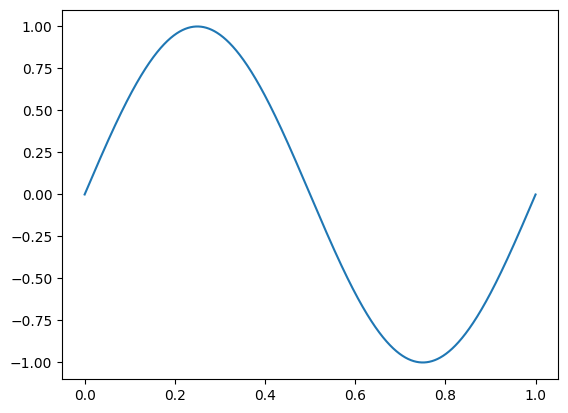

In [6]:
plt.plot(time , signal)
plt.show()

CRETAE AN AUDIABLE SIGNAL

In [14]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) ## every item in array
signal = np.sin(np.pi *2 * freq * time)  ## 44100 in a sin wav in one cycle


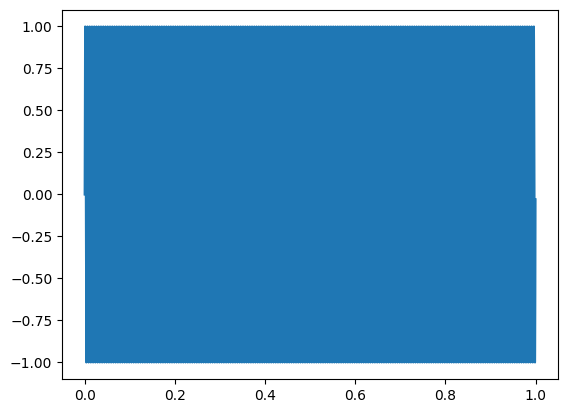

In [15]:
plt.plot(time , signal)
plt.show()

In [16]:
signal *= 32767
signal = np.int16(signal)
wavfile.write("file.wav" , sample_rate , signal)

we can change the signals frequencies to get variety of waves with respect to the pitch

In [12]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) ## every item in array

signal = np.sin(np.pi *2 * freq * time)  ## 44100 in a sin wav in one cycle

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_sin.wav" , sample_rate , signal)

TRIANGLE WAVE SHAPE

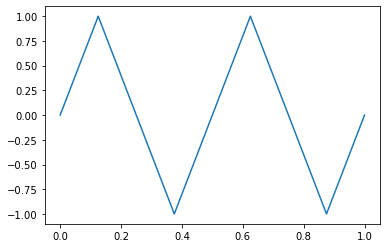

In [5]:
freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 
x = np.pi *2 * freq * time 
signal = np.abs((x/np.pi-0.5)%2-1)*2-1 

plt.plot(time , signal)
plt.show()

# signal *= 32767
# signal = np.int16(signal)
# wavfile.write("file.wav" , sample_rate , signal)

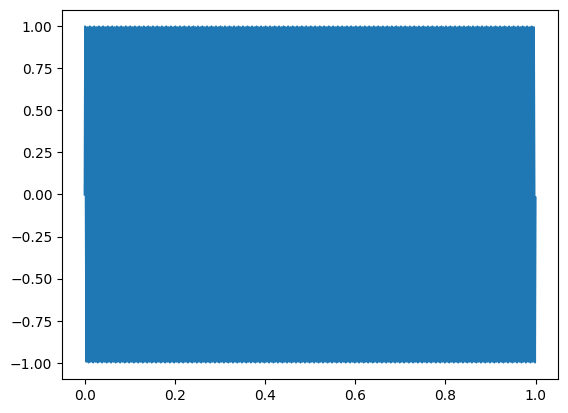

In [8]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 
x = np.pi *2 * freq * time 
signal = np.abs((x/np.pi-0.5)%2-1)*2-1 #

plt.plot(time , signal)
plt.show()

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_traingle.wav" , sample_rate , signal)

SQUARE WAVE

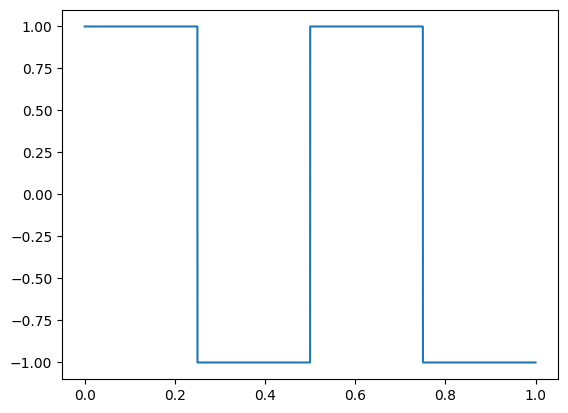

In [9]:
freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = np.where(x/np.pi%2 > 1,-1,1)

plt.plot(time , signal)
plt.show()


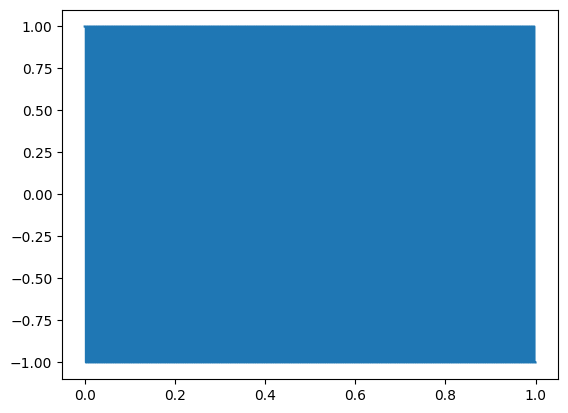

In [10]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = np.where(x/np.pi%2 > 1,-1,1)

plt.plot(time , signal)
plt.show()

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_square.wav" , sample_rate , signal)

SAW TOOTH WAVE

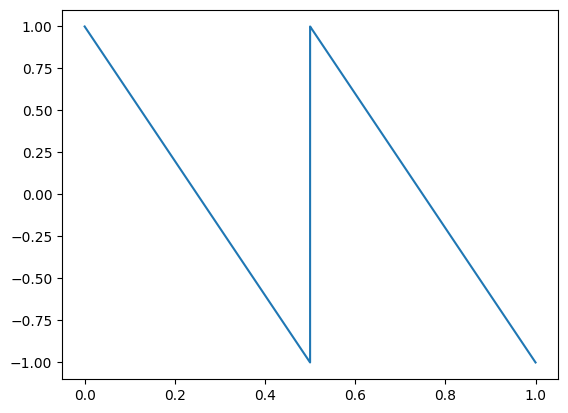

In [13]:
freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = -((x/np.pi)%2)+1

plt.plot(time , signal)
plt.show()


In [19]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = -((x/np.pi)%2)+1

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_saw.wav" , sample_rate , signal)

NOISE SIGNALS 

1 ] RANDOM SET OF VALUES ALL OVER THE SPECTRUM WITHOUT ANY DISTRIBUTION

2 ] NORMAML NOISE WITH RESPECT TO SAMPLE RATE 

RANDOM NOISE

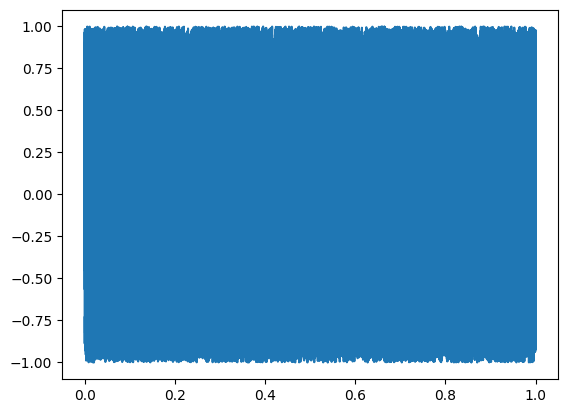

In [17]:
freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = np.random.random(int(length*sample_rate))*2.0 - 1.0

plt.plot(time , signal)
plt.show()


In [20]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = np.random.random(int(length*sample_rate))*2.0 - 1.0


signal *= 32767
signal = np.int16(signal)
wavfile.write("file_noise.wav" , sample_rate , signal)

NORMAL NOISE

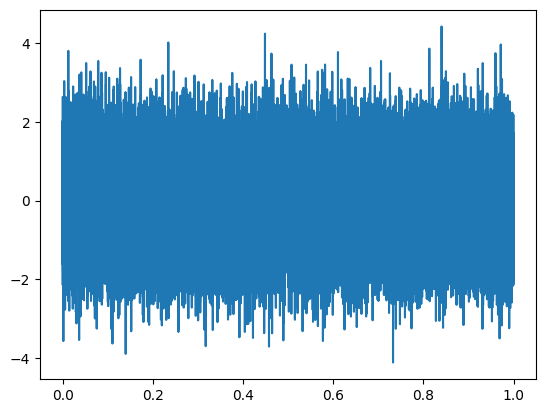

In [21]:
freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = np.random.randn(int(length*sample_rate))

plt.plot(time , signal)
plt.show()


In [ ]:
freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = np.random.randn(int(length*sample_rate))


signal *= 32767
signal = np.int16(signal)
wavfile.write("file_noise2.wav" , sample_rate , signal)

PROBLEM IS values are above our desired threshold , so distortion will come into existence

so we addd a normalization function to treat that

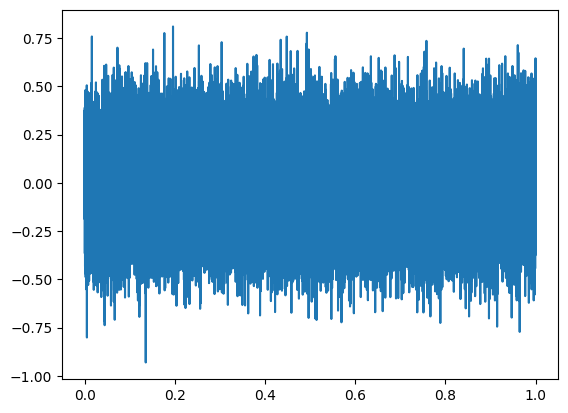

In [24]:
def norm(data):
    min_v = min(data)
    max_v = max(data)
    offset = min_v + max_v
    data = data + (offset/2)
    data = np.array([((x-min_v) / (max_v-min_v)) for x in data])*2.0-1
    return data * ((max_v/min_v)*-1)


freq = 2 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length,1.0/sample_rate) 

x = np.pi *2 * freq * time 

signal = norm(np.random.randn(int(length*sample_rate)))

plt.plot(time , signal)
plt.show()

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_noise2_normalized.wav" , sample_rate , signal)

PHASE DISTORTION SYNTHETIC SOUND

divide length with freq , give only one cycle of desisred freq

Basic oscialltor
sin sqaure

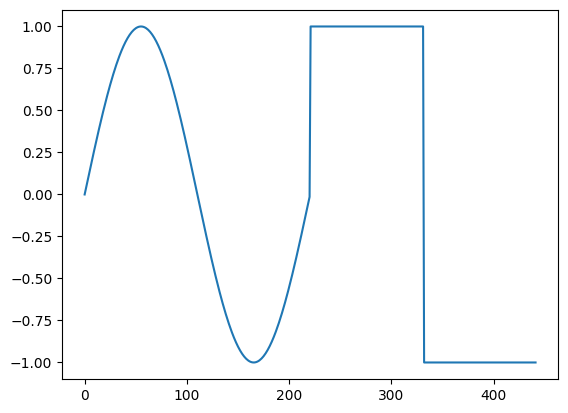

In [26]:
freq = 200 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length/freq,1.0/sample_rate) 
x =  np.pi *2 * freq * time 

sin_square = np.append(np.sin(x),np.where(x/np.pi%2 > 1,-1,1))

# signal = np.sin(x) 

plt.plot(range(len(time)*2), sin_square)
plt.show()



multiply this multiple times to get our length

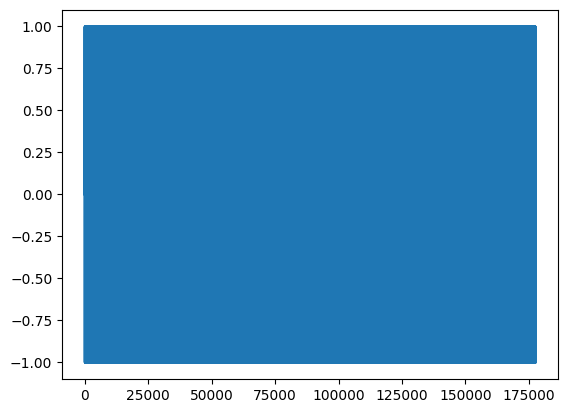

In [27]:
freq = 600 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length/freq,1.0/sample_rate) 
x =  np.pi *2 * freq * time 

sin_square = np.append(np.sin(x),np.abs((x/np.pi-0.5)%2-1)*2-1)

signal = np.array(list(sin_square) * (int(freq*2)))

plt.plot(range(len(signal)), signal)
plt.show()

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_sin_sqaure.wav" , sample_rate , signal)

DIFFERENT COMBINATIONS TO EXPLORE

TRIANGLE WITH SAW

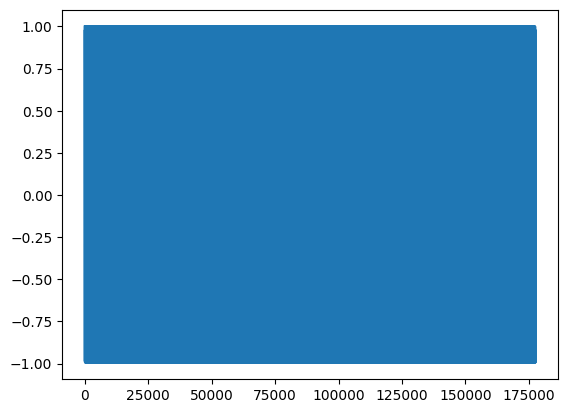

In [29]:
freq = 600 #hz
sample_rate = 44100
length = 1.0  #length of signal

time = np.arange(0,length/freq,1.0/sample_rate) 
x =  np.pi *2 * freq * time 

sin_square = np.append(-((x/np.pi)%2)+1,np.abs((x/np.pi-0.5)%2-1)*2-1)

signal = np.array(list(sin_square) * (int(freq*2)))

plt.plot(range(len(signal)), signal)
plt.show()

signal *= 32767
signal = np.int16(signal)
wavfile.write("file_triangle_saw.wav" , sample_rate , signal)

Lets pack all in the class 

80's digital synth oscillator

In [33]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

class ToneGenerator:
    
    sample_rate = 44100
    
    def __init__(self):

        self.length = None
        self.freq = None
        self.signal = None
        self.shape = None
        
    def Render(self, length, freq, shape):
        self.sample_rate = 44100
        self.length = length
        self.freq = freq
        self.shape = shape     
        self.time = np.arange(0, self.length , 1.0 / ToneGenerator.sample_rate) 
        x = np.pi * 2 * self.freq * self.time  
        
        if shape == "sine":
            self.signal = np.sin(x)
        elif shape == "triangle":
            self.signal = np.abs((x / np.pi - 0.5) % 2 - 1) * 2 - 1
        elif shape == "square":
            self.signal = np.where(x / np.pi % 2 > 1, -1, 1)
        elif shape == "saw":
            self.signal = -((x / np.pi) % 2) + 1
        else:
            self.signal = np.random.random(int(self.length*ToneGenerator.sample_rate))*2.0 - 1.0
        
        return self.signal
            
    def plot(self):
        plt.plot(self.time, self.signal)
        plt.show()

    def norm(self, data):
        min_v = min(data)
        max_v = max(data)
        offset = min_v + max_v
        data = data + (offset / 2)
        data = np.array([((x - min_v) / (max_v - min_v)) for x in data]) * 2.0 - 1
        return data * ((max_v / min_v) * -1)

    @staticmethod
    def write_file(signal, name="file.wav"):
        signal *= 32767
        signal = np.int16(signal)
        wavfile.write(name, ToneGenerator.sample_rate, signal)  # Fixed 'sample_rate'



tone = ToneGenerator()

ToneGenerator.write_file(tone.Render(3.0 , 2634 , "saw"))

How to use this as a chain of notes

In [41]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

class ToneGenerator:
    
    sample_rate = 44100
    
    def __init__(self):

        self.length = None
        self.freq = None
        self.signal = None
        self.shape = None
        
    def Render(self, length, freq, shape):
        self.sample_rate = 44100
        self.length = length
        self.freq = freq
        self.shape = shape     
        self.time = np.arange(0, self.length , 1.0 / ToneGenerator.sample_rate) 
        x = np.pi * 2 * self.freq * self.time  
        
        if shape == "sine":
            self.signal = np.sin(x)
        elif shape == "triangle":
            self.signal = np.abs((x / np.pi - 0.5) % 2 - 1) * 2 - 1
        elif shape == "square":
            self.signal = np.where(x / np.pi % 2 > 1, -1, 1)
        elif shape == "saw":
            self.signal = -((x / np.pi) % 2) + 1
        else:
            self.signal = np.random.random(int(self.length*ToneGenerator.sample_rate))*2.0 - 1.0
        
        return self.signal
            
    def plot(self):
        plt.plot(self.time, self.signal)
        plt.show()

    def norm(self, data):
        min_v = min(data)
        max_v = max(data)
        offset = min_v + max_v
        data = data + (offset / 2)
        data = np.array([((x - min_v) / (max_v - min_v)) for x in data]) * 2.0 - 1
        return data * ((max_v / min_v) * -1)

    @staticmethod
    def write_file(signal, name="file_melody6.wav"):
        signal *= 32767
        signal = np.int16(signal)
        wavfile.write(name, ToneGenerator.sample_rate, signal)  # Fixed 'sample_rate'



tone = ToneGenerator()

#list of freqs

freqs = [432,654,852,354,264,48,658,5234,6457,35]
melody = []

# for i in range(len(freqs)):
#     melody += list(tone.Render(0.1 , freqs[i] , "saw"))

# for i in range((200)):
#     melody += list(tone.Render(0.1 , freqs[i%len(freqs)] , "saw"))

# for i in range((500)):
#     melody += list(tone.Render(0.02 , freqs[i%len(freqs)]+(i*3) , "saw"))

for i in range((500)):
    melody += list(tone.Render(0.02 - (i*0.000001) , freqs[i%len(freqs)]+(i*3) , "saw"))

ToneGenerator.write_file(np.array(melody))